### VUONG Christophe 
# <center>TP3 - Views, Updates and Design</center>


The objectives for this TP are:

1. Create and use SQL Views
2. Update database content
3. Design the database schema for a Social Network

___

For the first 2 parts we will use the **`wine.db`** database and the Tables created in TP2.

A reminder of the wine database schema:

<center>**Master1**</center>

|*Attribute*|         *Description*          |
| -------   |--------------------------------|
| NV        | Wine number                    |
| CRU       | Vineyard or group of vineyards |
| DEGRE     | Alcohol content                |
| MILL      | Vintage year                   |
| QTE       | Number of bottles harvested    |
| NP        | Producer number                |
| NOM       | Producer's last name           |
| PRENOM    | Producer's first name          |
| REGION    | Production region              |

<center>**Master2**</center>

|*Attribute*|                         *Description*                  |
| -------   |--------------------------------------------------------|
| NV        | Wine number                                            |
| CRU       | Vineyard or group of vineyards                         |
| DEGRE     | Alcohol content                                        |
| MILL      | Vintage year                                           |
| DATES     | Buying date                                            |
| LIEU      | Place where the wine was sold                          |
| QTE       | Number of bottles bought                               |
| NB        | Client (buveur) number                                 |
| NOM       | Client's last name                                     |
| PRENOM    | Client's first name                                    |
| TYPE      | Type of client by volume of purchases                  |
| REGION    | Administrative Region (different to production region) |


In [1]:
import sqlite3

In [2]:
def printSchema(connection):
    ### Source: http://stackoverflow.com/a/35092773/4765776
    for (tableName,) in connection.execute(
        """
        select NAME from SQLITE_MASTER where TYPE='table' order by NAME;
        """
    ):
        print("{}:".format(tableName))
        for (
            columnID, columnName, columnType,
            columnNotNull, columnDefault, columnPK,
        ) in connection.execute("pragma table_info('{}');".format(tableName)):
            print("  {id}: {name}({type}){null}{default}{pk}".format(
                id=columnID,
                name=columnName,
                type=columnType,
                null=" not null" if columnNotNull else "",
                default=" [{}]".format(columnDefault) if columnDefault else "",
                pk=" *{}".format(columnPK) if columnPK else "",
            ))

In [3]:
conn = sqlite3.connect('wine.db')
c = conn.cursor()
print("Database schema:")
printSchema(conn)

Database schema:
MASTER1:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
  4: QTE(NUM)
  5: NP(NUM)
  6: NOM(TEXT)
  7: PRENOM(TEXT)
  8: REGION(TEXT)
MASTER2:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
  4: DATES(DATE)
  5: LIEU(TEXT)
  6: QTE(NUM)
  7: NB(NUM)
  8: NOM(TEXT)
  9: PRENOM(TEXT)
  10: TYPE(TEXT)
  11: REGION(TEXT)
master1_cru:
  0: NV(NUM)
  1: CRU(TEXT)
master1_deg:
  0: NV(NUM)
  1: DEGRE(NUM)
master1_mill:
  0: NV(NUM)
  1: MILL(NUM)
master1_nom:
  0: NP(NUM)
  1: NOM(TEXT)
master1_prenom:
  0: NP(NUM)
  1: PRENOM(TEXT)
  2: REGION(TEXT)
master1_qte:
  0: NV(NUM)
  1: NP(NUM)
  2: QTE(NUM)
master2_cru:
  0: NV(NUM)
  1: CRU(TEXT)
master2_deg:
  0: NV(NUM)
  1: DEGRE(NUM)
master2_mill:
  0: NV(NUM)
  1: MILL(NUM)
master2_nom:
  0: NB(NUM)
  1: NOM(TEXT)
master2_prenom:
  0: NB(NUM)
  1: PRENOM(TEXT)
  2: TYPE(TEXT)
master2_qte:
  0: NV(NUM)
  1: NB(NUM)
  2: DATES(NUM)
  3: QTE(NUM)
  4: LIEU(TEXT)
  5: REGION(TEXT)


Again, we will use **`%%sql`** magic for our queries

In [4]:
%load_ext sql
%sql sqlite:///wine.db

'Connected: @wine.db'

Recreate the Normalized Tables from **Master1** and **Master2** as you did in the TP2

In [7]:
%%sql 

-- Create Master_1 tables distinct values

DROP TABLE IF EXISTS master1_qte;
CREATE TABLE master1_qte AS
SELECT DISTINCT NV,NP,QTE
FROM MASTER1;

DROP TABLE IF EXISTS master1_cru;
CREATE TABLE master1_cru AS
SELECT DISTINCT NV,CRU
FROM MASTER1;

DROP TABLE IF EXISTS master1_mill;
CREATE TABLE master1_mill AS
SELECT DISTINCT NV,MILL
FROM MASTER1;

DROP TABLE IF EXISTS master1_deg;
CREATE TABLE master1_deg AS
SELECT DISTINCT NV,DEGRE
FROM MASTER1;

DROP TABLE IF EXISTS master1_nom;
CREATE TABLE master1_nom AS
SELECT DISTINCT NP,NOM
FROM MASTER1;

DROP TABLE IF EXISTS master1_prenom;
CREATE TABLE master1_prenom AS
SELECT DISTINCT NP,PRENOM,REGION
FROM MASTER1;


-- Create Master_2 tables (distinct)

DROP TABLE IF EXISTS master2_qte;
CREATE TABLE master2_qte AS
SELECT DISTINCT NV,NB,DATES,QTE,LIEU,REGION
FROM MASTER2;

DROP TABLE IF EXISTS master2_cru;
CREATE TABLE master2_cru AS
SELECT DISTINCT NV,CRU
FROM MASTER2;

DROP TABLE IF EXISTS master2_mill;
CREATE TABLE master2_mill AS
SELECT DISTINCT NV,MILL
FROM MASTER2;

DROP TABLE IF EXISTS master2_deg;
CREATE TABLE master2_deg AS
SELECT DISTINCT NV,DEGRE
FROM MASTER2;


DROP TABLE IF EXISTS master2_nom;
CREATE TABLE master2_nom AS
SELECT DISTINCT NB,NOM
FROM MASTER2;

DROP TABLE IF EXISTS master2_prenom;
CREATE TABLE master2_prenom AS
SELECT DISTINCT NB,PRENOM,TYPE
FROM MASTER2;

 * sqlite:///wine.db
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.


[]

___
# PART I: CREATE AND USE VIEWS

A view is a virtual table based on the result-set of an SQL statement. Views are stored in the database with an associated name.

Views are created following the syntax:

```mysql
CREATE VIEW view_name AS
SELECT column1, column2.....
FROM table_name
WHERE [condition];
```

An useful command:

```mysql
DROP VIEW IF EXISTS view_name;
```


__Warning:__ Use `DROP` with caution (only drop something if you are sure)

__Note:__ You will find some cells marked as "Test" that will help you check your work. Do NOT modify them. 

#### Exercise 1.1

Create a view "**bons_buveurs**" with the clients (buveurs) of type 'gros' or 'moyen'.

In [10]:
%%sql

DROP VIEW IF EXISTS bons_buveurs;
CREATE VIEW bons_buveurs AS
SELECT master2_nom.NB,NOM,PRENOM,TYPE
FROM 
(master2_nom JOIN master2_prenom ON master2_nom.NB = master2_prenom.NB) 
WHERE TYPE IS "gros" OR TYPE IS "moyen";

 * sqlite:///wine.db
Done.
Done.


[]

In [7]:
# Test
%sql SELECT * FROM bons_buveurs ORDER BY nb;

Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
10,Andersen,Yann,gros
12,Bataille,Georges,moyen
13,Barthes,Roland,moyen
14,Bory,Jean Louis,gros


In [11]:
# Test
%sql SELECT * FROM bons_buveurs ORDER BY nb;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
10,Andersen,Yann,gros
12,Bataille,Georges,moyen
13,Barthes,Roland,moyen
14,Bory,Jean Louis,gros


#### Exercise 1.2

Create the view "**buveurs_asec**" with clients (buveurs) who have not bought any wine.

In [31]:
%%sql

DROP VIEW IF EXISTS BUVEURS_ASEC;
CREATE VIEW buveurs_asec AS
SELECT C.NB, C.NOM, C.PRENOM, C.TYPE 
FROM (master2_nom JOIN master2_prenom ON master2_nom.NB = master2_prenom.NB) AS C
WHERE master2_nom.NB NOT NULL AND NOT EXISTS(
    SELECT master2_nom.NB
    FROM (master2_nom INNER JOIN master2_qte
          ON master2_nom.NB = master2_qte.NB)
    INNER JOIN master2_cru
    ON master2_cru.NV = master2_qte.NV AND C.NB = master2_nom.NB
    WHERE master2_qte.QTE NOT NULL
);

 * sqlite:///wine.db
Done.
Done.


[]

In [9]:
# Test
%sql SELECT * FROM buveurs_asec ORDER BY nb;

Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


In [32]:
%sql SELECT * FROM buveurs_asec ORDER BY nb;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


#### Exercise 1.3

Create the view "**buveurs_achats**" complementary to the previous one.

In [35]:
%%sql
DROP VIEW IF EXISTS buveurs_achats;
CREATE VIEW buveurs_achats AS
SELECT C.NB, C.NOM, C.PRENOM, C.TYPE 
FROM (master2_nom JOIN master2_prenom ON master2_nom.NB = master2_prenom.NB) AS C
WHERE master2_nom.NB NOT NULL AND EXISTS(
    SELECT master2_nom.NB
    FROM (master2_nom INNER JOIN master2_qte
          ON master2_nom.NB = master2_qte.NB)
    INNER JOIN master2_cru
    ON master2_cru.NV = master2_qte.NV AND C.NB = master2_nom.NB
    WHERE master2_qte.QTE NOT NULL
);

 * sqlite:///wine.db
Done.
Done.


[]

In [11]:
# Test
%sql SELECT * FROM buveurs_achats ORDER BY nb;

Done.


NB,NOM,PRENOM,TYPE
1,Aristote,None,petit
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
5,Audiberti,Jacques,petit
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
9,Ajar,Emile,petit
10,Andersen,Yann,gros


In [36]:
%sql SELECT * FROM buveurs_achats ORDER BY nb;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
1,Aristote,None,petit
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
5,Audiberti,Jacques,petit
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
9,Ajar,Emile,petit
10,Andersen,Yann,gros


#### Exercise 1.4

Create the view "**q83pl**" (LIEU, CRU, QTE_BUE) that provides by LIEU and CRU the total quantities bought in 1983 by all the clients (buveurs).

In [37]:
%%sql
DROP VIEW IF EXISTS q83pl;
CREATE VIEW q83pl AS
SELECT master2_qte.LIEU, master2_cru.CRU,  SUM(master2_qte.qte) AS QTE_BUE
FROM master2_qte
INNER JOIN master2_cru
ON master2_cru.NV = master2_qte.nv
WHERE strftime('%Y', master2_qte.dates) = '1983'
GROUP BY master2_qte.LIEU, master2_cru.CRU

 * sqlite:///wine.db
Done.
Done.


[]

In [13]:
# Test
%sql SELECT * FROM q83pl;

Done.


LIEU,CRU,QTE_BUE
CAEN,Seyssel,3
LILLE,Pommard,5
LYON,Beaujolais Villages,10
LYON,Julienas,2
PARIS,Beaujolais Primeur,4
PARIS,Coteaux du Tricastin,1
PARIS,Pouilly Vinzelles,3
RENNES,Mercurey,1
ROCQUENCOURT,Beaujolais Villages,260
ROCQUENCOURT,Saint Amour,80


In [38]:
%sql SELECT * FROM q83pl;

 * sqlite:///wine.db
Done.


LIEU,CRU,QTE_BUE
CAEN,Seyssel,3
LILLE,Pommard,5
LYON,Beaujolais Villages,10
LYON,Julienas,2
PARIS,Beaujolais Primeur,4
PARIS,Coteaux du Tricastin,1
PARIS,Pouilly Vinzelles,3
RENNES,Mercurey,1
ROCQUENCOURT,Beaujolais Villages,260
ROCQUENCOURT,Saint Amour,80


#### Exercise 1.5

Can we define the same view with ascending order over the attribute "QTE"? Provide an explanation for your answer.

___
# PART II: UPDATE DATABASE CONTENT

The syntax for the `UPDATE` operation is:

```sql
UPDATE table_name
SET column1 = value1, column2 = value2...., columnN = valueN
WHERE [condition];
```

The syntax for the `INSERT` operation is:

```sql
INSERT INTO table_name [(column1, column2, column3,...columnN)]  
VALUES (value1, value2, value3,...valueN);
```

Database updates are commited automatically in Jupyter/Python. _Transactions_ are an option to control and reverse changes. Additionally we can just reload a backup of the database (NOT an option in deployed systems)

__Note:__ Different to other Database Management Systems, SQLite views are read-only and so you can not execute a `DELETE`, `INSERT` or `UPDATE` statement on a view.

#### Exercise 2.1

Create a table "**RBB**" with the same schema as "**bons_buveurs**" which contains the tuples selected from "**bons_buveurs**"

In [43]:
%%sql
DROP TABLE IF EXISTS RBB;
CREATE TABLE RBB AS
SELECT *  
FROM bons_buveurs
ORDER BY NB

 * sqlite:///wine.db
Done.
Done.


[]

In [15]:
# Test
%sql SELECT * FROM RBB;

Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
10,Andersen,Yann,gros
12,Bataille,Georges,moyen
13,Barthes,Roland,moyen
14,Bory,Jean Louis,gros


In [44]:
%sql SELECT * FROM RBB;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
10,Andersen,Yann,gros
12,Bataille,Georges,moyen
13,Barthes,Roland,moyen
14,Bory,Jean Louis,gros


#### Exercise 2.2

Update the table you used to create "**bons_buveurs**": Change the "type" to 'gros' if the total of quantities bought is over 100.

Find the instances to update (schema may differ from the one in your table)

In [16]:
# test

Done.


NB,NOM,PRENOM,TYPE,total
2,Artaud,Antonin,moyen,583
5,Audiberti,Jacques,petit,113
9,Ajar,Emile,petit,140
44,Gide,Andre,petit,171


In [45]:
%%sql
SELECT master2_nom.nb AS NB, NOM, PRENOM, TYPE , SUM(QTE) AS total
FROM (master2_nom INNER JOIN master2_prenom
      ON master2_nom.NB = master2_prenom.NB
      INNER JOIN master2_qte 
      ON master2_nom.NB = master2_qte.NB
      INNER JOIN master2_cru
      ON master2_cru.NV = master2_qte.NV)
      AS B
      GROUP BY B.NB
HAVING SUM(QTE) > 100 AND type!='gros'

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE,total
2,Artaud,Antonin,moyen,583
5,Audiberti,Jacques,petit,113
9,Ajar,Emile,petit,140
44,Gide,Andre,petit,171


Update instances

In [72]:
%%sql 
UPDATE master2_prenom
SET TYPE = 'gros'
WHERE master2_prenom.NB in (
    SELECT master2_prenom.NB
    FROM  (master2_prenom INNER JOIN master2_nom
      ON master2_nom.NB = master2_prenom.NB
      INNER JOIN master2_qte 
      ON master2_prenom.NB = master2_qte.NB
      INNER JOIN master2_cru
      ON master2_cru.NV = master2_qte.NV)
    GROUP BY master2_nom.NB
    HAVING SUM(QTE) >100 AND TYPE != 'gros'
);

 * sqlite:///wine.db
4 rows affected.


[]

#### Exercise 2.3

Compare the content of _table_ "**RBB**" and the _view_ "**bons_buveurs**" after the update. What differences do you see? Explain

In [75]:
%%sql
Select *
FROM RBB

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
10,Andersen,Yann,gros
12,Bataille,Georges,moyen
13,Barthes,Roland,moyen
14,Bory,Jean Louis,gros


In [73]:
%%sql
SELECT * 
FROM bons_buveurs
EXCEPT
Select *
FROM RBB

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,gros
5,Audiberti,Jacques,gros
9,Ajar,Emile,gros
44,Gide,Andre,gros


#### Exercise 2.4

Create a table "**RBA**" with the same schema as "**buveurs_asec**" which contains the tuples selected from "**buveurs_asec**"

In [76]:
%%sql
DROP TABLE IF EXISTS RBA;
CREATE TABLE RBA AS
SELECT *  
FROM buveurs_asec

 * sqlite:///wine.db
Done.
Done.


[]

In [19]:
# Test
%sql SELECT * FROM RBA

Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


In [77]:
%sql SELECT * FROM RBA

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


#### Exercise 2.5

Insert a tuple (101, 'your last name', 'your first name', 'your type of purchases(petit, moyen, or gros)') to "**RBA**".

In [78]:
%%sql
INSERT INTO RBA
VALUES (101, 'VUONG', 'Christophe', 'moyen') ;

 * sqlite:///wine.db
1 rows affected.


[]

In [21]:
# Test
%sql SELECT * FROM RBA

Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


In [79]:
%sql SELECT * FROM RBA

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


#### Exercise 2.6

Compare the content of _table_ "**RBA**" and the _view_ "**buveurs_asec**". What differences do you see? Explain

In [80]:
%%sql

SELECT *
FROM RBA
EXCEPT
SELECT *
FROM BUVEURS_ASEC

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
101,VUONG,Christophe,moyen


___
# PART III: Design the database schema for posts in a Social Network

In this section your task is to design the database schema for a social network app of a new startup:

The new social network will contain users, where each user will have a name, a nickname, an email, date of birth, and an address (Street, City, State, Country, Postal Code). Users can be friends of other users, and can publish posts. Each post can contain a text, date and attachment. Posts can be either original posts or replies so the app needs to handle both scenarios. When users log in, the app needs to display the posts of their friends.

**Note:** You can create diagrams of your proposal and insert them as images into this notebook.

#### Exercise 3.1

Write and explain the design of the relations of your database

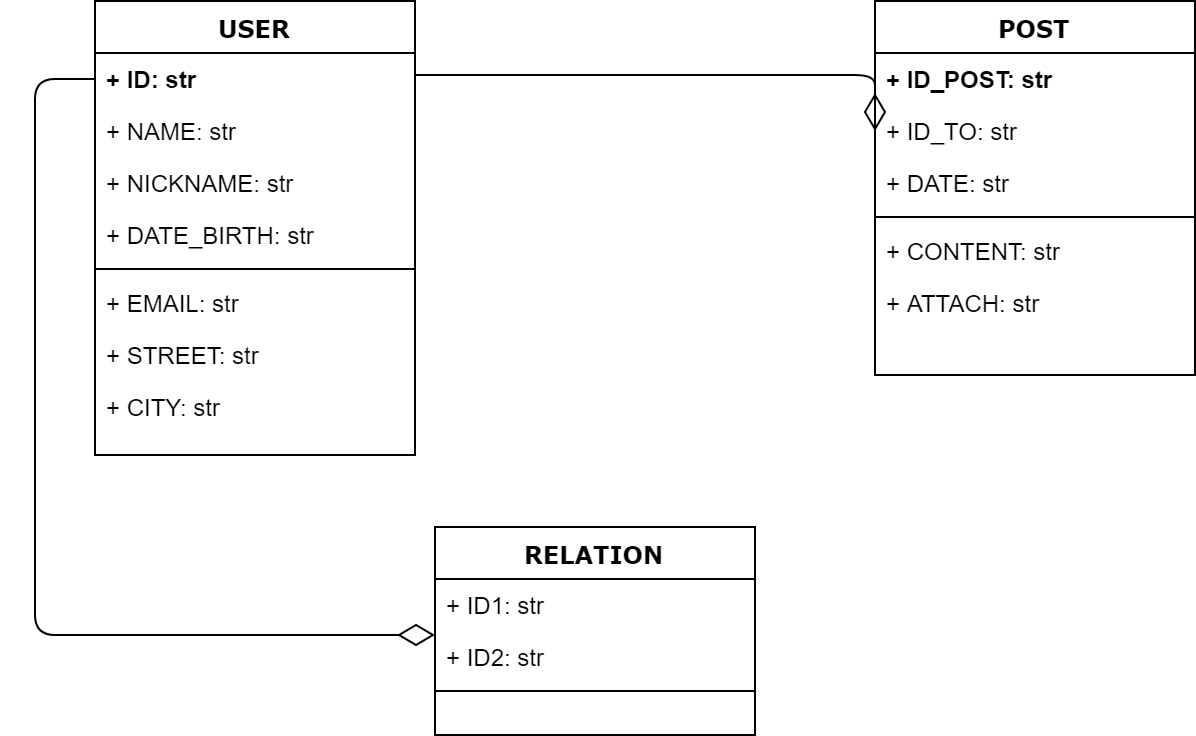

In [1]:
# Not to touch
from IPython.display import Image
Image(filename='Table.png') 

The tables show the keys as the upper part of the tables. The relation based on keys are drawn in the schema above.

It is known that diffrent users can have the same name and nickname. So we can not use name, date of birth and nickname as a key of this table, as to make sure to avoid the mix between twins or between persons who choose the same nickname that have the same name. 

That can be taken in account with an id to identify the user. All the information about contact information are optional. We can not predict the functional dependency between the attributes of address. So I decide not to split contact information in a new table. We do not store threads of posts with that structure, as posts are considered as original or answer to another one.  

The attribute ID_POST in POST table is for the author of original post. Let suppose that someone answer to that original post, tha person's post will have a ID_POST and an ID_TO that matches the original author, otherwise the attribute is set to NULL. 

We may want to use an ID for friendship as well in order to avoid redundant relationships. Nevertheless, since there is no reason to favor AB to BA here, I decide to store both. It can be better when we need to count friends, but it may not represent group of friends in a convenient way.

#### Exercise 3.2

Write a view to retrieve the posts to display when a user logs in. Consider that some users may have a lot of friends and you need to limit the number of post to display. How would you select relevant posts to display first? What kind of information would you use/add in the database for this purpose? Explain your answer.

__Note:__ Limiting the number of posts just by count is too simplistic, the user could be missing something interesting to him/her.

I think the achievement of intimacy can be decided by the number of interation between the users. If user A replies to the post of user B, achievement of intimacy from A to B will increase. The achievement of intimacy can also be derived from the number of common friends of each pair of users. So first, we can create a view intimacy for this user: 

CREATE VIEW nb_reply FROM SELECT post.id_post, post.id_to, count(POST.id_to) FROM POST GROUP BY POST.id_post, POST.id_to 
 
 
We can use the same method to get the number of common friends.

CREATE VIEW Commonfriends FROM SELECT RELATION.id1, id1, COUNT (*) FROM RELATION JOIN RELATION ON (SELECT RELATION.id1 AS id1, RELATION.id2 AS id2 FROM RELATION) WHERE RELATION.id2 = id2 GROUP BY RELATION.id1, id1  

With both view, we have the parameters to build a table of achievement of intimacy for each user in the friend list. With this achievemement, we can show just show closest friend's posts.